In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from collections.abc import Iterable

In [2]:
with open(r'files/topicDict.pkl', 'rb') as f:
    topicDict = pickle.load(f)
    
with open(r'files/refTopicDict.pkl', 'rb') as f2:
    refDict = pickle.load(f2)

In [3]:
df = pd.read_csv('files/topics_abstract.txt', delimiter= '\t')

In [4]:
refDf = pd.read_csv('files/topics_refs.txt', delimiter= '\t')

In [5]:
refDf['refTopics'] = [ eval(x) for x in refDf['refTopics'] ]

In [6]:
df = df.merge(refDf, left_on='PMID', right_on='PMID')

In [7]:
df = df.groupby('topic')['refTopics'].apply(list).reset_index(name='refTopics')

In [8]:
def flatten(l):
    for el in l:
        if isinstance(el, Iterable) and not isinstance(el, (str, bytes)):
            yield from flatten(el)
        else:
            yield el

In [9]:
df['refTopics'] =  df['refTopics'].apply(lambda x:list(flatten(x)))

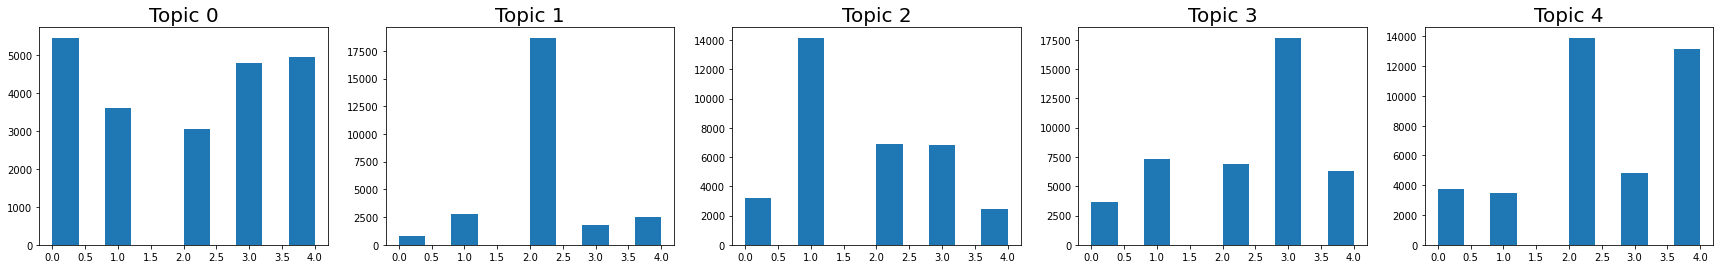

In [10]:
rows = ((len(df)-2) // 5) + 1
fig, axes = plt.subplots(rows, 5, figsize=(30, (4*rows)), sharex=True) # 1x5 plot
axes = axes.flatten()
for i in range(0, len(df)):
    ax = axes[i]
    ax.hist(df[df['topic']==i]['refTopics'])
    ax.set_title(f"Topic {i}", fontdict={"fontsize": 20})

plt.show()

In [11]:
topicDict

{0: ['gene',
  'expression',
  'genome',
  'transcription',
  'promoter',
  'region',
  'sequence',
  'regulatory',
  'regulation',
  'function'],
 1: ['patient',
  'health',
  'trial',
  'treatment',
  'hiv',
  'study',
  'research',
  'discus',
  'disease',
  'risk'],
 2: ['cell',
  'response',
  'mouse',
  'stem',
  'infection',
  'tumor',
  'signaling',
  'expression',
  'immune',
  'virus'],
 3: ['protein',
  'network',
  'interaction',
  'structure',
  'binding',
  'complex',
  'domain',
  'model',
  'motif',
  'method'],
 4: ['population',
  'specie',
  'genetic',
  'genome',
  'human',
  'selection',
  'variation',
  'sequence',
  'mutation',
  'evolution']}

In [12]:
refDict

{0: ['gene',
  'expression',
  'drosophila',
  'regulation',
  'mouse',
  'pattern',
  'development',
  'control',
  'evolution',
  'identification'],
 1: ['cell',
  'stem',
  'receptor',
  'cycle',
  'mouse',
  'dendritic',
  'embryonic',
  'growth',
  'factor',
  'signaling'],
 2: ['human',
  'virus',
  'immunodeficiency',
  'type',
  'infection',
  'disease',
  'study',
  'genetic',
  'population',
  'mutation'],
 3: ['protein',
  'structure',
  'kinase',
  'interaction',
  'function',
  'complex',
  'family',
  'domain',
  'network',
  'yeast'],
 4: ['genome',
  'analysis',
  'sequence',
  'dna',
  'evolution',
  'comparative',
  'sequencing',
  'initial',
  'genomic',
  'molecular']}